In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [30]:
df = pd.read_json('mongo-enron.json')
df['date'] = df['time'].apply(datetime.datetime.fromtimestamp)
df['day'] = pd.DatetimeIndex(df['date']).normalize()

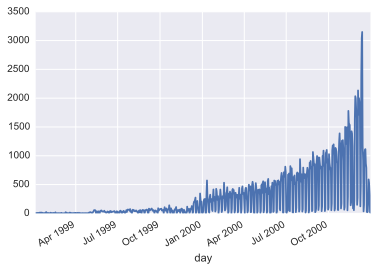

In [63]:
counts = df.groupby(df[['day', 'date']]['day']).count()
def year(y):
    return datetime.datetime.strptime(str(y), "%Y")
subset = counts[(counts.index < year(2001)) & (counts.index > year(1999))]
subset['date'].plot()